<a href="https://colab.research.google.com/github/Alina-Smol/pythonmatlabwolfram/blob/main/titanic1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from pandas.core.common import maybe_iterable_to_list
import numpy as np
import pandas as pd
data = pd.read_csv('titanic.csv', delimiter=',')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
data[["Sex", "Survived"]].pivot_table(index=["Sex"], columns=["Survived"], aggfunc=len)
data[data["Survived"]==1][["Sex", "Age"]].pivot_table(values=["Age"], index=["Sex"], aggfunc="mean")
data.groupby("Pclass").mean()["Age"]

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [6]:
pd.pivot_table(data[["Sex", "Survived"]],
index = ["Sex"],
columns = ["Survived"],
aggfunc = len)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [14]:
data = data.assign(Expensive = list([0] * data.shape[0]))
pd.pivot_table(data[['Expensive', 'Survived']], index = ["Expensive"],columns = ["Survived"],aggfunc = len)


Survived,0,1
Expensive,,
0,549,342


In [15]:
data['Fare_bin'] = data['Fare']
data.loc[(data['Fare'] < 20), 'Fare_bin'] = 'Дешево'
data.loc[(data['Fare'] >= 20), 'Fare_bin'] = 'Дорого'
print(data['Fare_bin'])
print(data['Fare_bin'].value_counts())

0      Дешево
1      Дорого
2      Дешево
3      Дорого
4      Дешево
        ...  
886    Дешево
887    Дорого
888    Дорого
889    Дорого
890    Дешево
Name: Fare_bin, Length: 891, dtype: object
Дешево    515
Дорого    376
Name: Fare_bin, dtype: int64


In [16]:
data[["Sex", "Survived", "Age"]].pivot_table(values=["Age"], index=["Sex"], columns=["Survived"], aggfunc="mean")

Age           
Survived          0          1
Sex                           
female    25.046875  28.847716
male      31.618056  27.276022

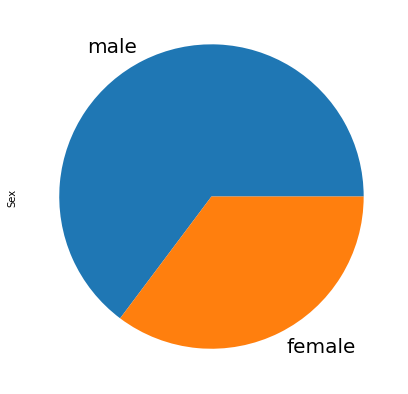

In [17]:
data["Sex"].value_counts().plot(kind="pie", figsize=(7, 7), fontsize=20);

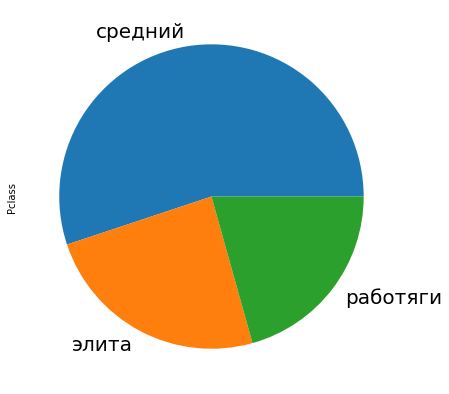

In [18]:
data['Pclass'] = data['Pclass'].replace(to_replace=[1, 2, 3], value=['элита', 'работяги', 'средний'])

data["Pclass"].value_counts().plot(kind="pie", figsize=(7, 7), fontsize=20);

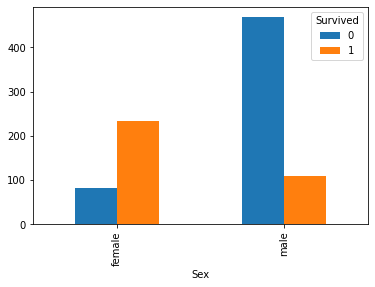

In [19]:
data[["Sex", "Survived"]].pivot_table(index=["Sex"], columns=["Survived"], aggfunc=len).plot(kind="bar");